# Table Manipulation and Visualization

**Materials**: 
* [Class](https://github.com/Antogin/materials-su19)

In [3]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re

from shutil import unpack_archive

## The data set
---
### Github most starred repos

GitHub is the leader in hosting open source projects. For those who are not familiar with open source projects, a group of developers share and contribute to common code to develop software. 

### Content

For this study,we extracted a list of the top starred open source projects. On GitHub, a user may choose the star a repository representing that they “like” the project. For each project, we got the repository username or Organization the project resided in, the repository name, a description, the last updated date, the language of the project, the number of stars, any tags, and finally the url of the project.

# Part 1: Understanding the dataset

### Q1.1: load the dataset

In [4]:
repos = Table().read_table('TopRatedRepos.csv')
repos

Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Number of Forks
freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codebase and cu ...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,nodejs,javascr ...",https://github.com/freeCodeCamp/freeCodeCamp,23262
twbs,bootstrap,"The most popular HTML, CSS, and JavaScript framework for ...",2017-06-24T15:40:21Z,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap,67527
EbookFoundation,free-programming-books,Freely available programming books,2017-06-23T01:09:34Z,nan,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-programming-books,32974
facebook,react,"A declarative, efficient, and flexible JavaScript librar ...",2017-06-24T19:33:49Z,JavaScript,69.7k,nan,https://github.com/facebook/react,26698
d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31T06:03:47Z,JavaScript,65.7k,visualization,https://github.com/d3/d3,21590
getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23T10:42:36Z,JavaScript,62k,"book-series,javascript,training-materials,async,educatio ...",https://github.com/getify/You-Dont-Know-JS,22440
tensorflow,tensorflow,Computation using data flow graphs for scalable machine ...,2017-06-24T18:25:42Z,C++,61.6k,"tensorflow,python,machine-learning,deep-neural-networks, ...",https://github.com/tensorflow/tensorflow,78752
sindresorhus,awesome,Curated list of awesome lists,2017-06-24T17:26:02Z,nan,60.7k,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome,16014
vuejs,vue,"A progressive, incrementally-adoptable JavaScript framew ...",2017-06-24T15:38:55Z,JavaScript,57.7k,"javascript,vue,framework,frontend",https://github.com/vuejs/vue,22841
angular,angular.js,AngularJS - HTML enhanced for web apps!,2017-06-24T06:25:23Z,JavaScript,56.2k,nan,https://github.com/angular/angular.js,28853


### Q1.2: How many rows does or dataset have?



In [5]:
num_rows = repos.num_rows
num_rows

980

### Q1.3: Create a table with only python projects

Top projects are dominated by Javascript projects, let's show python some love!

Hint use `where`

In [6]:
pythonProjects = Table().read_table('TopRatedRepos.csv').where('Language', are.equal_to('Python'))
pythonProjects

Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Number of Forks
vinta,awesome-python,"A curated list of awesome Python frameworks, libraries, ...",2017-06-18T09:43:08Z,Python,35.3k,"python,awesome,collections",https://github.com/vinta/awesome-python,14983
jakubroztocil,httpie,Modern command line HTTP client user-friendly curl alte ...,2017-06-18T06:18:33Z,Python,30.2k,"python,debugging,cli,http,client,json,development,termin ...",https://github.com/jakubroztocil/httpie,2881
nvbn,thefuck,Magnificent app which corrects your previous console com ...,2017-06-19T21:12:47Z,Python,28.6k,"python,shell",https://github.com/nvbn/thefuck,2524
pallets,flask,"A microframework based on Werkzeug, Jinja2 and good inte ...",2017-06-21T23:13:36Z,Python,27.8k,"python,flask,web-framework,wsgi,jinja,werkzeug",https://github.com/pallets/flask,13090
rg3,youtube-dl,Command-line program to download videos from YouTube.com ...,2017-06-24T19:15:47Z,Python,26.9k,nan,https://github.com/rg3/youtube-dl,10095
django,django,The Web framework for perfectionists with deadlines.,2017-06-24T14:49:32Z,Python,26.4k,"python,django,views,framework,orm,web,apps,templates,models",https://github.com/django/django,19659
requests,requests,Python HTTP Requests for Humans,2017-06-16T22:31:24Z,Python,25.7k,"python,http,requests,forhumans,kennethreitz",https://github.com/requests/requests,7446
ansible,ansible,Ansible is a radically simple IT automation platform tha ...,2017-06-24T19:07:24Z,Python,23.9k,"python,ansible",https://github.com/ansible/ansible,17583
josephmisiti,awesome-machine-learning,"A curated list of awesome Machine Learning frameworks, l ...",2017-06-24T16:58:31Z,Python,23.7k,nan,https://github.com/josephmisiti/awesome-machine-learning,10809
minimaxir,big-list-of-naughty-strings,The Big List of Naughty Strings is a list of strings whi ...,2017-05-26T17:09:45Z,Python,21.2k,nan,https://github.com/minimaxir/big-list-of-naughty-strings,1454


### Q1.4: Filter our data

For this exercie we are mostly going to focus on `Username`, `Repository Name`, `Language`, `Number of Forks` and `Number of Stars`.
Create a table with only those values

Hint use `select`

In [7]:
cleanData = repos.select('Username', 'Repository Name', 'Language', 'Number of Forks', 'Number of Stars')
cleanData

Username,Repository Name,Language,Number of Forks,Number of Stars
freeCodeCamp,freeCodeCamp,JavaScript,23262,290k
twbs,bootstrap,JavaScript,67527,112k
EbookFoundation,free-programming-books,nan,32974,87.8k
facebook,react,JavaScript,26698,69.7k
d3,d3,JavaScript,21590,65.7k
getify,You-Dont-Know-JS,JavaScript,22440,62k
tensorflow,tensorflow,C++,78752,61.6k
sindresorhus,awesome,nan,16014,60.7k
vuejs,vue,JavaScript,22841,57.7k
angular,angular.js,JavaScript,28853,56.2k


---

# Part 2: Clean up

### Q2.1: What is type of the column Number of Stars?

Hint Lab04 `Q1.1`

In [9]:
typeOfNumberOfStars = type(repos.column("Number of Stars").item(0))
typeOfNumberOfStars

str

### Q2.2: Create a python function that turns the string `290k` into a float

Hint lab04 `Q1.4`

In [10]:
d3Stars = '65.7k'
d3Stars

'65.7k'

In [15]:
def toFloat(starts):
    total_stars = 0
    if 'k' in starts:
        if len(starts) > 1:
            total_stars = float(starts.replace('k', '')) * 1000
    else:
        total_stars = int(starts) # Less than 1000
    return float(total_stars)

In [16]:
### this should return True
toFloat(d3Stars) == 65700.

True

### Q2.3: Apply that function to the `Number of Stars` column

Hint: Lab04 `Q3.1`

In [17]:
NumberOfStarsAsFloat = repos.apply(toFloat, "Number of Stars")
NumberOfStarsAsFloat

array([290000., 112000.,  87800.,  69700.,  65700.,  62000.,  61600.,
        60700.,  57700.,  56200.,  55200.,  54100.,  51600.,  50900.,
        50000.,  47200.,  46300.,  45300.,  44900.,  44300.,  42800.,
        39100.,  37800.,  37700.,  37600.,  36400.,  36400.,  36100.,
        35600.,  35300.,  35200.,  33800.,  33600.,  32900.,  32500.,
        32000.,  31900.,  31800.,  31800.,  31000.,  30700.,  30200.,
        30200.,  30100.,  30100.,  29600.,  29400.,  29400.,  29400.,
        29200.,  29100.,  29000.,  28600.,  28200.,  27800.,  27800.,
        27800.,  27600.,  27200.,  26900.,  26900.,  26700.,  26600.,
        26600.,  26400.,  26400.,  25900.,  25700.,  25700.,  25300.,
        25200.,  24400.,  24300.,  24300.,  24100.,  24000.,  23900.,
        23900.,  23800.,  23700.,  23600.,  23600.,  23400.,  23300.,
        23200.,  23200.,  23100.,  23000.,  23000.,  22900.,  22800.,
        22500.,  22500.,  22300.,  22300.,  22000.,  21900.,  21900.,
        21900.,  218

### Q2.4 Add `Rounded Number of stars` to the table with the values of `NumberOfStarsAsFloat`

Hint: Lab04 `Q3.1`

In [18]:
withRoundedStars = repos.with_column(
    "Rounded Number",
    repos.apply(toFloat, "Number of Stars"))
withRoundedStars

Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Number of Forks,Rounded Number
freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codebase and cu ...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,nodejs,javascr ...",https://github.com/freeCodeCamp/freeCodeCamp,23262,290000
twbs,bootstrap,"The most popular HTML, CSS, and JavaScript framework for ...",2017-06-24T15:40:21Z,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap,67527,112000
EbookFoundation,free-programming-books,Freely available programming books,2017-06-23T01:09:34Z,nan,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-programming-books,32974,87800
facebook,react,"A declarative, efficient, and flexible JavaScript librar ...",2017-06-24T19:33:49Z,JavaScript,69.7k,nan,https://github.com/facebook/react,26698,69700
d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31T06:03:47Z,JavaScript,65.7k,visualization,https://github.com/d3/d3,21590,65700
getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23T10:42:36Z,JavaScript,62k,"book-series,javascript,training-materials,async,educatio ...",https://github.com/getify/You-Dont-Know-JS,22440,62000
tensorflow,tensorflow,Computation using data flow graphs for scalable machine ...,2017-06-24T18:25:42Z,C++,61.6k,"tensorflow,python,machine-learning,deep-neural-networks, ...",https://github.com/tensorflow/tensorflow,78752,61600
sindresorhus,awesome,Curated list of awesome lists,2017-06-24T17:26:02Z,nan,60.7k,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome,16014,60700
vuejs,vue,"A progressive, incrementally-adoptable JavaScript framew ...",2017-06-24T15:38:55Z,JavaScript,57.7k,"javascript,vue,framework,frontend",https://github.com/vuejs/vue,22841,57700
angular,angular.js,AngularJS - HTML enhanced for web apps!,2017-06-24T06:25:23Z,JavaScript,56.2k,nan,https://github.com/angular/angular.js,28853,56200


### Q2.5 Sort `withRoundedStars` Least starred repo should be at the top


In [23]:
sortedRepos = withRoundedStars.sort("Rounded Number")
sortedRepos

Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Number of Forks,Rounded Number
bodymovin,bodymovin,after effects to html library,2017-06-21T11:24:06Z,JavaScript,6.4k,nan,https://github.com/bodymovin/bodymovin,1804,6400
thoughtbot,laptop,A shell script to set up a macOS laptop for web and mobi ...,2017-06-21T22:13:55Z,Shell,6.4k,nan,https://github.com/thoughtbot/laptop,1804,6400
boltdb,bolt,An embedded key/value database for Go.,2017-06-21T09:14:46Z,Go,6.4k,"go,database,key-value",https://github.com/boltdb/bolt,1148,6400
braziljs,js-the-right-way,"An easy-to-read, quick reference for JS best practices, ...",2017-06-21T01:54:02Z,HTML,6.4k,"javascript,best-practices,js,guide",https://github.com/braziljs/js-the-right-way,897,6400
plotly,plotly.js,The open source JavaScript graphing library that powers ...,2017-06-23T21:32:19Z,JavaScript,6.4k,"d3,webgl,charting-library,plotly,data-visualization",https://github.com/plotly/plotly.js,1294,6400
poteto,hiring-without-whiteboards,Companies that don't have a broken hiring process,2017-06-23T22:40:38Z,JavaScript,6.4k,"whiteboard,interview,tech,jobs,hiring,airtable,hiring-wi ...",https://github.com/poteto/hiring-without-whiteboards,1388,6400
chrisjenx,Calligraphy,Custom fonts in Android the easy way...,2017-06-06T19:23:22Z,Java,6.4k,nan,https://github.com/chrisjenx/Calligraphy,1080,6400
eliangcs,http-prompt,HTTPie + prompt_toolkit = an interactive command-line HT ...,2017-05-11T13:27:42Z,Python,6.4k,"python,syntax-highlighting,shell,cli,http,autocomplete,j ...",https://github.com/eliangcs/http-prompt,288,6400
robertdavidgraham,masscan,"TCP port scanner, spews SYN packets asynchronously, scan ...",2017-06-22T06:27:09Z,C,6.4k,nan,https://github.com/robertdavidgraham/masscan,1867,6400
ElemeFE,mint-ui,Mobile UI elements for Vue.js,2017-06-22T10:02:35Z,Vue,6.4k,"vue,mobile,component,vue-components,ui-kit",https://github.com/ElemeFE/mint-ui,3379,6400


---

# Part 3: Basic stats

### Q3.1: What is the avrage amount of stars?

Hint use `np.average`

In [26]:
def isNotString(x):
    try:
        float(x)
        return True
    except:
        return False

def isNotNan(x):
    return not np.isnan(float(x))

In [28]:
starsAvrage = withRoundedStars.select('Rounded Number').where('Rounded Number').column('Rounded Number')
starsAvrage

array([290000., 112000.,  87800.,  69700.,  65700.,  62000.,  61600.,
        60700.,  57700.,  56200.,  55200.,  54100.,  51600.,  50900.,
        50000.,  47200.,  46300.,  45300.,  44900.,  44300.,  42800.,
        39100.,  37800.,  37700.,  37600.,  36400.,  36400.,  36100.,
        35600.,  35300.,  35200.,  33800.,  33600.,  32900.,  32500.,
        32000.,  31900.,  31800.,  31800.,  31000.,  30700.,  30200.,
        30200.,  30100.,  30100.,  29600.,  29400.,  29400.,  29400.,
        29200.,  29100.,  29000.,  28600.,  28200.,  27800.,  27800.,
        27800.,  27600.,  27200.,  26900.,  26900.,  26700.,  26600.,
        26600.,  26400.,  26400.,  25900.,  25700.,  25700.,  25300.,
        25200.,  24400.,  24300.,  24300.,  24100.,  24000.,  23900.,
        23900.,  23800.,  23700.,  23600.,  23600.,  23400.,  23300.,
        23200.,  23200.,  23100.,  23000.,  23000.,  22900.,  22800.,
        22500.,  22500.,  22300.,  22300.,  22000.,  21900.,  21900.,
        21900.,  218

In [30]:
np.average(starsAvrage)

12985.714285714286

### Q3.2: What is the most starred PHP repo

Hint use `group`

In [45]:
phpRepo = repos.where('Language', are.equal_to('PHP'))
phpRepo

Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Number of Forks
laravel,laravel,A PHP Framework For Web Artisans,2017-06-23T08:57:24Z,PHP,32.9k,"php,laravel,framework",https://github.com/laravel/laravel,17377
symfony,symfony,The Symfony PHP framework,2017-06-24T16:50:33Z,PHP,14.7k,"php-framework,php,symfony,framework,bundle,symfony-bundl ...",https://github.com/symfony/symfony,7304
bcit-ci,CodeIgniter,Open Source PHP Framework (originally from EllisLab),2017-06-22T12:40:13Z,PHP,14.6k,php,https://github.com/bcit-ci/CodeIgniter,7765
domnikl,DesignPatternsPHP,sample code for several design patterns in PHP,2017-05-31T09:15:27Z,PHP,12.8k,"php,designpatternsphp,design-pattern,oop,phpunit,design- ...",https://github.com/domnikl/DesignPatternsPHP,3916
fzaninotto,Faker,Faker is a PHP library that generates fake data for you,2017-06-23T14:30:48Z,PHP,11.1k,nan,https://github.com/fzaninotto/Faker,2591
yiisoft,yii2,"Yii 2: The Fast, Secure and Professional PHP Framework",2017-06-24T10:51:32Z,PHP,10.4k,"yii,php,framework,yii2,php-framework",https://github.com/yiisoft/yii2,6846
composer,composer,Dependency Manager for PHP,2017-06-22T14:43:26Z,PHP,9.5k,"composer,php,dependency-manager,package-manager,packages",https://github.com/composer/composer,5680
guzzle,guzzle,"Guzzle, an extensible PHP HTTP client",2017-06-23T22:56:10Z,PHP,9.3k,"guzzle,curl,psr-7,httpclient,webservices",https://github.com/guzzle/guzzle,2011
WordPress,WordPress,"WordPress, Git-ified. Synced via SVN every 15 minutes, i ...",2017-06-24T18:08:09Z,PHP,9.3k,nan,https://github.com/WordPress/WordPress,8036
PHPMailer,PHPMailer,The classic email sending library for PHP,2017-06-23T08:29:41Z,PHP,9k,nan,https://github.com/PHPMailer/PHPMailer,7681


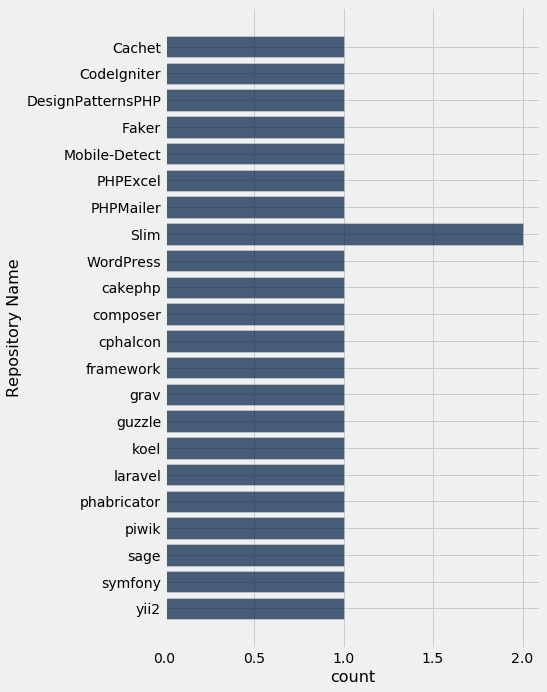

In [46]:
phpRepo.group('Repository Name').barh('Repository Name')

### Q3.3: Top 10 most forked repos

Hint Lab03 Q4

In [61]:
forkedRepo = repos.select('Repository Name', 'Number of Forks').sort('Number of Forks', descending=True)
forkedRepo

Repository Name,Number of Forks
Spoon-Knife,107160
tensorflow,78752
bootstrap,67527
gitignore,47307
models,37894
free-programming-books,32974
opencv,30520
linux,29171
angular.js,28853
spring-boot,27841


# Part 4: Visualization
Hint: Stack overflow analysis

### Q4.1: Does more stars means more forks?

In order to find that out create a scatter plot displayong the relationship bettwen Numbers of stars and forks

In [74]:
NumberOfStarsAsFloat = repos.apply(toFloat, "Number of Stars")
NumberOfStarsAsFloat

array([290000., 112000.,  87800.,  69700.,  65700.,  62000.,  61600.,
        60700.,  57700.,  56200.,  55200.,  54100.,  51600.,  50900.,
        50000.,  47200.,  46300.,  45300.,  44900.,  44300.,  42800.,
        39100.,  37800.,  37700.,  37600.,  36400.,  36400.,  36100.,
        35600.,  35300.,  35200.,  33800.,  33600.,  32900.,  32500.,
        32000.,  31900.,  31800.,  31800.,  31000.,  30700.,  30200.,
        30200.,  30100.,  30100.,  29600.,  29400.,  29400.,  29400.,
        29200.,  29100.,  29000.,  28600.,  28200.,  27800.,  27800.,
        27800.,  27600.,  27200.,  26900.,  26900.,  26700.,  26600.,
        26600.,  26400.,  26400.,  25900.,  25700.,  25700.,  25300.,
        25200.,  24400.,  24300.,  24300.,  24100.,  24000.,  23900.,
        23900.,  23800.,  23700.,  23600.,  23600.,  23400.,  23300.,
        23200.,  23200.,  23100.,  23000.,  23000.,  22900.,  22800.,
        22500.,  22500.,  22300.,  22300.,  22000.,  21900.,  21900.,
        21900.,  218

In [75]:
withRoundedStars = repos.with_column(
    "Rounded Number",
    repos.apply(toFloat, "Number of Stars"))
withRoundedStars

Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Number of Forks,Rounded Number
freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codebase and cu ...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,nodejs,javascr ...",https://github.com/freeCodeCamp/freeCodeCamp,23262,290000
twbs,bootstrap,"The most popular HTML, CSS, and JavaScript framework for ...",2017-06-24T15:40:21Z,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap,67527,112000
EbookFoundation,free-programming-books,Freely available programming books,2017-06-23T01:09:34Z,nan,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-programming-books,32974,87800
facebook,react,"A declarative, efficient, and flexible JavaScript librar ...",2017-06-24T19:33:49Z,JavaScript,69.7k,nan,https://github.com/facebook/react,26698,69700
d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31T06:03:47Z,JavaScript,65.7k,visualization,https://github.com/d3/d3,21590,65700
getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23T10:42:36Z,JavaScript,62k,"book-series,javascript,training-materials,async,educatio ...",https://github.com/getify/You-Dont-Know-JS,22440,62000
tensorflow,tensorflow,Computation using data flow graphs for scalable machine ...,2017-06-24T18:25:42Z,C++,61.6k,"tensorflow,python,machine-learning,deep-neural-networks, ...",https://github.com/tensorflow/tensorflow,78752,61600
sindresorhus,awesome,Curated list of awesome lists,2017-06-24T17:26:02Z,nan,60.7k,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome,16014,60700
vuejs,vue,"A progressive, incrementally-adoptable JavaScript framew ...",2017-06-24T15:38:55Z,JavaScript,57.7k,"javascript,vue,framework,frontend",https://github.com/vuejs/vue,22841,57700
angular,angular.js,AngularJS - HTML enhanced for web apps!,2017-06-24T06:25:23Z,JavaScript,56.2k,nan,https://github.com/angular/angular.js,28853,56200


In [82]:
starsR = withRoundedStars.select('Rounded Number').column('Rounded Number')
starsR

array([290000., 112000.,  87800.,  69700.,  65700.,  62000.,  61600.,
        60700.,  57700.,  56200.,  55200.,  54100.,  51600.,  50900.,
        50000.,  47200.,  46300.,  45300.,  44900.,  44300.,  42800.,
        39100.,  37800.,  37700.,  37600.,  36400.,  36400.,  36100.,
        35600.,  35300.,  35200.,  33800.,  33600.,  32900.,  32500.,
        32000.,  31900.,  31800.,  31800.,  31000.,  30700.,  30200.,
        30200.,  30100.,  30100.,  29600.,  29400.,  29400.,  29400.,
        29200.,  29100.,  29000.,  28600.,  28200.,  27800.,  27800.,
        27800.,  27600.,  27200.,  26900.,  26900.,  26700.,  26600.,
        26600.,  26400.,  26400.,  25900.,  25700.,  25700.,  25300.,
        25200.,  24400.,  24300.,  24300.,  24100.,  24000.,  23900.,
        23900.,  23800.,  23700.,  23600.,  23600.,  23400.,  23300.,
        23200.,  23200.,  23100.,  23000.,  23000.,  22900.,  22800.,
        22500.,  22500.,  22300.,  22300.,  22000.,  21900.,  21900.,
        21900.,  218

In [83]:
NumberofForks = repos.select('Number of Forks').column('Number of Forks')
NumberofForks

array([ 23262,  67527,  32974,  26698,  21590,  22440,  78752,  16014,
        22841,  28853,  18152,  17605,  47307,  10403,  18561,  10481,
        29171,  18806,  27626,  16072,  13457,   8072,  13437,   5084,
        10438,  15564,   7738,  18026,   4944,  14983,  14334,   8795,
        21568,  17377,   7762,  13462,   6412,   6853,   3829,   7554,
        10040,   8060,   2881,  13137,   8581,  13065,   6629,   1121,
         9916,   9365,  17314,  12401,   2524,   8646,  13090,   6120,
         5333,   6548,   4837,   8079,  10095,   7649,   4402,  13212,
         5679,  19659,   2395,   7446,   5776,  15145,   6906,   6177,
        21382,   4544,   5863,  15604,   9377,  17583,     10,  10809,
        14702,   3471,  15422,  12122,   2523,   7634,   1395,   7849,
         6904,   4478,   4038,   5744,   7591,   4442,   6279,   6337,
         6620,   3874,   4291,   5789,   6565,   2359,   3959,  13633,
         1454,   8191,   5453,   4232,   2626,   3034,   7667,   5793,
      

In [84]:
scatterData = Table().with_columns(
    'Rounded Number', starsR,
    'Number of Forks', NumberofForks
)
scatterDatat.show(10)

NameError: name 'scatterDatat' is not defined

### Q4.2: Remove extreme values

In order to have a better graph we are going to filter out extreme values
Create a table where Rounded Number of stars are below 100000 and Number of Forks bellow 10000
Then create a new scatter graph 

In [187]:
withoutExtremes = ...
withoutExtremes

Ellipsis

### Q4.3: How are the stars distributed?

In order to find that out create a histogram with the number of stars

Hint Lab04 `Q4.1`

### Q4.4: Wich users appear the most in the dataset?

Plot a bar chart with the top 10 user at the top

### Q4.5: Wich users have the most amout of stars across thier projects?

Create a bar chart with the total amount of stars a user has across the data set
then create a bar chart for the top 10 users

### Q4.6: What is the avrage amout of stars per language

Create a bar chart with that data